# Curso de Big Data

## Trabajo Practico 4

### Integrantes del grupo: Sebastián Einstoss, Sofía Marinkovic y Pilar Ruiz Orrico

## Parte 1: Análisis de la base de hogares y cálculo de pobreza

In [1]:
#importamos los paquetes a utilizar

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



#Importamos los modelos
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn import svm
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier


from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt


In [2]:
import warnings
warnings.filterwarnings("ignore")

### Ejercicio 1

In [3]:
#Cargamos la base de datos de HOGARES
data = pd.read_excel("usu_hogar_T121.xlsx")
dfh = data.copy()
#Chequeamos que se vea bien
dfh.head(2)

,CODUSU,ANO4,TRIMESTRE,NRO_HOGAR,REALIZADA,REGION,MAS_500,AGLOMERADO,PONDERA,IV1,...,GDECCFR,PDECCFR,ADECCFR,PONDIH,VII1_1,VII1_2,VII2_1,VII2_2,VII2_3,VII2_4
0,TQRMNOQUPHMKKUCDEOJAH00701956,2021,1,1,1,44,N,93,77,1,...,NaN,12.0,12.0,0,96,0,98,0,0,0
1,TQRMNOPWXHMOKRCDEGLDF00701361,2021,1,1,1,41,N,15,140,1,...,NaN,6.0,8.0,191,2,0,3,5,6,0


In [4]:
## Seleccionamos solo los datos de CABA y GBA (para HOGARES)
dfh = dfh[(dfh["AGLOMERADO"]==32) | (dfh["AGLOMERADO"]==33)]

#Chequeamos que se vea bien
dfh.head(5)

,CODUSU,ANO4,TRIMESTRE,NRO_HOGAR,REALIZADA,REGION,MAS_500,AGLOMERADO,PONDERA,IV1,...,GDECCFR,PDECCFR,ADECCFR,PONDIH,VII1_1,VII1_2,VII2_1,VII2_2,VII2_3,VII2_4
15,TQRMNOQXUHJMMUCDEIJAH00693031,2021,1,1,1,1,S,33,3255,1,...,3.0,NaN,4.0,5286,2,0,98,0,0,0
21,TQRMNOSRPHLLNRCDEIJAH00651171,2021,1,1,1,1,S,33,2331,1,...,4.0,NaN,5.0,3953,2,0,98,0,0,0
24,TQRMNOPVUHKLMNCDEIIAD00655817,2021,1,1,1,1,S,32,3219,1,...,6.0,NaN,4.0,6435,2,0,98,0,0,0
36,TQRMNORYTHLOPMCDEIJAH00655933,2021,1,1,1,1,S,33,11578,1,...,2.0,NaN,2.0,17494,1,0,8,0,0,0
43,TQRMNOQPVHLMNNCDEIIAD00650542,2021,1,1,1,1,S,32,4300,1,...,12.0,NaN,12.0,0,2,3,98,0,0,0


In [5]:
#Cargamos la base de datos INDIVIDUAL
dfi = pd.read_excel("usu_individual_T121.xlsx")
#Chequeamos que se vea bien
dfi.head(2)

,CODUSU,ANO4,TRIMESTRE,NRO_HOGAR,COMPONENTE,H15,REGION,MAS_500,AGLOMERADO,PONDERA,...,PDECIFR,ADECIFR,IPCF,DECCFR,IDECCFR,RDECCFR,GDECCFR,PDECCFR,ADECCFR,PONDIH
0,TQRMNOPPQHLKLMCDEFIAH00646702,2021,1,1,1,1,43,S,2,675,...,0.0,3.0,40000.0,8.0,8.0,8.0,8.0,0.0,7.0,1377
1,TQRMNOPPRHLKLMCDEFIAH00665104,2021,1,1,1,1,43,S,2,675,...,0.0,2.0,25000.0,6.0,6.0,6.0,6.0,0.0,5.0,723


In [6]:
## Seleccionamos solo los datos de CABA y GBA (base INDIVIDUAL)
dfi = dfi[(dfi["AGLOMERADO"]==32) | (dfi["AGLOMERADO"]==33)]

#Chequeamos que se vea bien
dfi.head(5)

,CODUSU,ANO4,TRIMESTRE,NRO_HOGAR,COMPONENTE,H15,REGION,MAS_500,AGLOMERADO,PONDERA,...,PDECIFR,ADECIFR,IPCF,DECCFR,IDECCFR,RDECCFR,GDECCFR,PDECCFR,ADECCFR,PONDIH
36799,TQRMNOPPRHKMLNCDEIIAD00655703,2021,1,1,1,1,1,S,32,1394,...,0.0,10.0,127500.0,10.0,0.0,10.0,10.0,0.0,10.0,2494
36800,TQRMNOPPRHKMLNCDEIIAD00655703,2021,1,1,2,1,1,S,32,1394,...,0.0,10.0,127500.0,10.0,0.0,10.0,10.0,0.0,10.0,2494
36801,TQRMNOPPWHKMNUCDEIIAD00655837,2021,1,1,1,1,1,S,32,3090,...,0.0,12.0,0.0,12.0,0.0,12.0,12.0,0.0,12.0,0
36802,TQRMNOPPWHKMNUCDEIIAD00655837,2021,1,1,2,1,1,S,32,3090,...,0.0,12.0,0.0,12.0,0.0,12.0,12.0,0.0,12.0,0
36803,TQRMNOPPWHKMNUCDEIIAD00655837,2021,1,1,3,1,1,S,32,3090,...,0.0,12.0,0.0,12.0,0.0,12.0,12.0,0.0,12.0,0


### Ejercicio 2

In [7]:
#Antes de unir ambas bases chequeamos la longitud de ambas para tener una forma de chequear
ldfh = len(dfh)
ldfi =len(dfi)
print("Longitud base hogares:", len(dfh) ,";Longitud base individual:", len(dfi))


Longitud base hogares: 1474 ;Longitud base individual: 4082


In [8]:
#Juntamos ambas bases

df = dfi.merge(dfh,how='left',on = ['CODUSU', 'NRO_HOGAR'],suffixes=('', '_y'))
df.drop(df.filter(regex='_y$').columns.tolist(),axis=1, inplace=True)
len(df)




4082

### Ejercicio 3 

En este inciso filtramos aquellos valores que no tiene sentido, como por ejemplo: Edades negativas y variables de ingreso que tomen valores negatvos. 

También reemplazamos los valores faltantes por la mediana y dropeamos variables que no consideramos relevantes. En el código se aclara cuales son.

Finalmente para realizar el analisis convertimos las variables categoricas en dummies.

In [9]:
#Dropeamos edades negativas
df.drop(df[df['CH06']< 0].index, inplace = True)
len(df)
df.head(2)

,CODUSU,ANO4,TRIMESTRE,NRO_HOGAR,COMPONENTE,H15,REGION,MAS_500,AGLOMERADO,PONDERA,...,V19_B,IX_TOT,IX_MEN10,IX_MAYEQ10,VII1_1,VII1_2,VII2_1,VII2_2,VII2_3,VII2_4
0,TQRMNOPPRHKMLNCDEIIAD00655703,2021,1,1,1,1,1,S,32,1394,...,2,2,0,2,1,2,98,0,0,0
1,TQRMNOPPRHKMLNCDEIIAD00655703,2021,1,1,2,1,1,S,32,1394,...,2,2,0,2,1,2,98,0,0,0


In [10]:
#Dropeamos variables ingreso negativas

df.drop(df[ (df['TOT_P12']<0)|(df['ITF']<0)|(df['IPCF']<0) |(df['P47T']<0)|(df['V19_AM']<0)|(df['T_VI']<0) |(df['PP06C']<0) |(df['PP06D']<0)|(df['PP08D1']<0)| (df['PP08D4']<0)| (df['PP08F1']<0)|(df['PP08F2']<0)|(df['PP08J1']<0)|(df['PP08J2']<0)|(df['PP08J3']<0)|(df['P21']<0)|(df['V2_M']<0)|(df['V3_M']<0)|(df['V4_M']<0)|(df['V5_M']<0)|(df['V8_M']<0)|(df['V9_M']<0)|(df['V10_M']<0)|(df['V11_M']<0)|(df['V12_M']<0)|(df['V18_M']<0)|(df['V21_M']<0)].index, inplace = True)


len(df)


3308

In [11]:
#Convertimos a la variable MAS_500 en dummy (igual que en el TP2)
#Para esto usamos una funcion de numpy

df['MAS_500'] = np.where(df['MAS_500']=='S',1,0)


In [12]:
#Reemplazamos las variables NaN por su mediana

mediana_df = df.median()
df = df.fillna(mediana_df)

#chequeamos
df.head(5)

,CODUSU,ANO4,TRIMESTRE,NRO_HOGAR,COMPONENTE,H15,REGION,MAS_500,AGLOMERADO,PONDERA,...,V19_B,IX_TOT,IX_MEN10,IX_MAYEQ10,VII1_1,VII1_2,VII2_1,VII2_2,VII2_3,VII2_4
0,TQRMNOPPRHKMLNCDEIIAD00655703,2021,1,1,1,1,1,1,32,1394,...,2,2,0,2,1,2,98,0,0,0
1,TQRMNOPPRHKMLNCDEIIAD00655703,2021,1,1,2,1,1,1,32,1394,...,2,2,0,2,1,2,98,0,0,0
3,TQRMNOPPWHKMNUCDEIIAD00655837,2021,1,1,2,1,1,1,32,3090,...,2,5,0,5,1,2,98,0,0,0
4,TQRMNOPPWHKMNUCDEIIAD00655837,2021,1,1,3,1,1,1,32,3090,...,2,5,0,5,1,2,98,0,0,0
5,TQRMNOPPWHKMNUCDEIIAD00655837,2021,1,1,4,1,1,1,32,3090,...,2,5,0,5,1,2,98,0,0,0


In [13]:
#Convertimos en dummy a variables categoricas
df = pd.get_dummies(data=df, columns =['PP11D_COD','IV1','IV3', 'IV4', 'IV6','IV7','IV9','IV10','IV11','II7', 'II8','II9', 'VII2_1', 'VII2_2', 'VII2_3', 'VII2_4','CH03','CH07','CH08', 'CH09', 'CH10', 'CH11', 'CH12', 'CH13', 'CH14', 'CH15', 'CH15_COD', 'CH16', 'CH16_COD', 'NIVEL_ED', 'ESTADO', 'CAT_OCUP', 'CAT_INAC', 'PP02E', 'PP03H', 'PP03I', 'PP03J', 'INTENSI', 'PP04A', 'PP04B_COD', 'PP04C', 'PP04C99', 'PP04D_COD', 'PP04G', 'PP05C_1', 'PP05C_2', 'PP05C_3','PP05H','PP06E', 'PP07A', 'PP07C', 'PP07D', 'PP07E', 'PP07J', 'PP07K', 'PP09A', 'PP09C', 'PP10A', 'PP10E', 'PP11A', 'PP11B_COD', 'PP11C', 'PP11C99', 'PP11D_COD', 'PP11L', 'PP11L1', 'PP11M', 'PP11N', 'PP11O', 'PP11P', 'PP11Q'])

In [14]:
#Dropeamos algunas variables(igual que en el TP2)
df = df.drop(['CH05','PP09A_ESP','PP09C_ESP','IMPUTA'], axis=1).copy()

#Dropeamos variables de la base de hogares
df = df.drop(['IV1_ESP','IV3_ESP','IV7_ESP','II7_ESP', 'II8_ESP'], axis=1).copy()

#Dropeamos las variables de deciles
df= df.drop(['DECIFR', 'IDECIFR', 'RDECIFR', 'GDECIFR', 'PDECIFR', 'ADECIFR', 'DECCFR', 'IDECCFR', 'RDECCFR', 'GDECCFR', 'PDECCFR', 'ADECCFR'],axis=1).copy() 

df= df.drop(['DECOCUR', 'IDECOCUR', 'RDECOCUR', 'GDECOCUR', 'PDECOCUR', 'ADECOCUR', 'DECINDR', 'IDECINDR', 'RDECINDR', 'GDECINDR', 'PDECINDR', 'ADECINDR'],axis=1).copy()

#Dropeamos las variables que no corresponden a respuestas de las familias
df=df.drop(['ANO4','COMPONENTE', 'H15', 'PONDERA','PONDIIO', 'PONDII', 'TRIMESTRE'], axis=1).copy()
df.head(2)

,CODUSU,NRO_HOGAR,REGION,MAS_500,AGLOMERADO,CH04,CH06,PP02C1,PP02C2,PP02C3,...,PP11O_8.0,PP11O_9.0,PP11P_0.0,PP11P_1.0,PP11P_2.0,PP11P_9.0,PP11Q_0.0,PP11Q_1.0,PP11Q_2.0,PP11Q_9.0
0,TQRMNOPPRHKMLNCDEIIAD00655703,1,1,1,32,1,29,0,0,0,...,0,0,1,0,0,0,1,0,0,0
1,TQRMNOPPRHKMLNCDEIIAD00655703,1,1,1,32,2,29,0,0,0,...,0,0,1,0,0,0,1,0,0,0


In [15]:
#Convertimos en dummy variables que toman solo dos valores (1 y 2 pasan a 1 y 0)
variables = ['IV5', 'IV8', 'IV12_1','IV12_2', 'IV12_3', 'II3', 'II4_1', 'II4_2', 'II4_3', 'II5', 'II6', 'V1', 'V2', 'V21', 'V22', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19_A', 'V19_B', 'PP02H', 'PP02I', 'PP03C', 'PP05E', 'PP06A', 'PP06H', 'PP07F1', 'PP07F2', 'PP07F3', 'PP07F4', 'PP07F5', 'PP07G1', 'PP07G2', 'PP07G3', 'PP07G4', 'PP07G_59', 'PP07H', 'PP07I', 'PP09B', 'PP10C', 'PP10D', 'PP11R', 'PP11S', 'PP11T' ]
for i in variables:
    df[i] = np.where(df[i]==1,1,0)

### Ejercicio 4 - Construcción de variables

Generamos dos variables para tener en cuenta a la hora de analizar la pobreza. La primera es si hay niños en el hogar (los cuales representan "una boca más que alimentar" y podría pensarseque hay una relación entre la cantidad de hijos y la pobreza), y la segunda es si se trata de un hogar del tipo monoparental con jefe de hogar femenino (intentando captar un efecto de la feminización de la pobreza)

In [16]:
#Primero genero un identificador por persona, para poder contarlos
df['IDF'] = range(1, 1+len(df))

#Genero una tabla contando la cantidad de personas menores de 18 en los hogares
Cantidad_de_ninos = df[df['CH06']<18].groupby("CODUSU")["IDF"].count()

#Uno esa tabla con la tabla oriiginal
df = df.merge(Cantidad_de_ninos,how='left',on = ['CODUSU'])

#Genero mi columna donde observo si efectivamente hay hijos
df["tiene_hijos"] = np.where(np.isnan(df['IDF_y']),0,df['IDF_y'])

#Dropeo todas las variables auxiliares
df.drop("IDF_y",inplace=True,axis=1)
df.drop("IDF_x",inplace=True,axis=1)
    
#Genero una dummy para identificar al jefe de familia
df["jefe_de_familia"] = np.where((df["CH03_2"]==0)&(df["CH03_3"]==0)&(df["CH03_4"]==0)&(df["CH03_5"]==0)&(df["CH03_6"]==0)&(df["CH03_7"]==0)&(df["CH03_8"]==0)&(df["CH03_9"]==0)&(df["CH03_10"]==0),1,0)
 
#Genero la variable de interes
df['hog_mono_fem_hijos'] = np.where((df["jefe_de_familia"]==1) & (df["CH04"]==2)& (df["tiene_hijos"]>=1),1,0) 
df.drop("jefe_de_familia",inplace=True,axis=1)

#df['hog_mono_fem_hijos'] = np.where((df["CH03_1"]==1) & (df["CH04"]==2)& (df["kids"]==1),1,0) 
df.head()

df[df['hog_mono_fem_hijos']==1].shape

#Tenemos un total de 210 hogares monoparentales con jefe de hogar femenino

(210, 1035)

### Ejercicio 5 - Gráfico

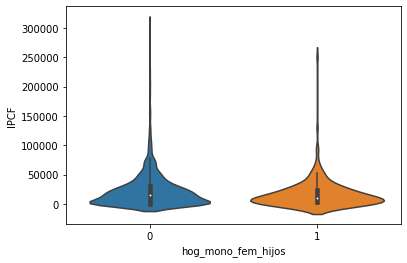

In [17]:
#Quiero ver la relación entre la presencia de hogares monoparentales mujeres y el ingreso

plot_1 = sns.violinplot(x="hog_mono_fem_hijos", y="IPCF", data=df)

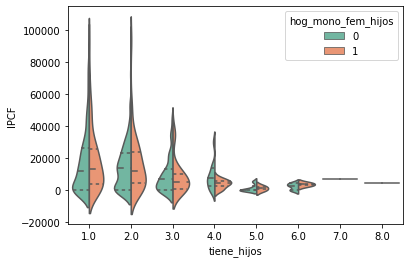

In [18]:
#Miramos el mismo grafico pero truncado en cuanto al ingreso (para observar mejor la distribución en la parte inferior)

plot_2 = sns.violinplot(x="tiene_hijos", y="IPCF", hue="hog_mono_fem_hijos",
                    data=df[(df["IPCF"]<100000)&(df["tiene_hijos"]!=0)], palette="Set2", split=True,
                    inner="quartile"
                    )

### Ejercicio 6

In [19]:
### Igual que en el TP2
ae = pd.read_excel("tabla_adulto_equiv.xlsx")
ae.head(5)

,"Tabla de equivalencias de necesidades energéticas. Unidades de adulto equivalente, según sexo y edad",Unnamed: 1,Unnamed: 2,Unnamed: 3
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,Edad,Mujeres,Varones,NaN
3,NaN,NaN,NaN,NaN
4,Menor de 1 año,0.35,0.35,NaN


In [20]:
#Acomodamos el archivo para poder trabajar
#eliminamos columnas
ae.drop(["Unnamed: 3"], axis = 1,inplace = True)

#chequeamos
ae.head(5)

,"Tabla de equivalencias de necesidades energéticas. Unidades de adulto equivalente, según sexo y edad",Unnamed: 1,Unnamed: 2
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,Edad,Mujeres,Varones
3,NaN,NaN,NaN
4,Menor de 1 año,0.35,0.35


In [21]:
### eliminamos las filas que no sirven
ae.dropna(inplace = True)
#chequeamos
ae.head(5)

,"Tabla de equivalencias de necesidades energéticas. Unidades de adulto equivalente, según sexo y edad",Unnamed: 1,Unnamed: 2
2,Edad,Mujeres,Varones
4,Menor de 1 año,0.35,0.35
5,1año,0.37,0.37
6,2 años,0.46,0.46
7,3 años,0.51,0.51


In [22]:
#Acomodamos los nombres de las columnas
ae.columns = ae.iloc[0]
ae.drop(2,inplace=True)
ae.reset_index()
#chequeamos
ae.head(5)

2,Edad,Mujeres,Varones
4,Menor de 1 año,0.35,0.35
5,1año,0.37,0.37
6,2 años,0.46,0.46
7,3 años,0.51,0.51
8,4 años,0.55,0.55


In [23]:
#Reacomodamos las filas
ae.reset_index()
ae = ae.melt(id_vars='Edad',value_vars=['Mujeres','Varones'],var_name='sexo')
ae.head()

,Edad,sexo,value
0,Menor de 1 año,Mujeres,0.35
1,1año,Mujeres,0.37
2,2 años,Mujeres,0.46
3,3 años,Mujeres,0.51
4,4 años,Mujeres,0.55


In [24]:
#Reordenamos las categorias por comodidad
ae.loc[ae['sexo'] == "Mujeres", 'sexo'] = 2
ae.loc[ae['sexo']== "Varones", 'sexo'] = 1
#Generamos sub-bases de datos con el fin de poder hacer el trabajo de forma ordenada
aem = ae[ae['sexo'] == 2]
aeh = ae[ae['sexo'] == 1].copy()

#reseteamos el indice de la segunda base
aeh.reset_index(inplace = True)


In [25]:
#Generamos un dataset con edades desde el 0 hasta el 110, para ambos sexos
m = pd.DataFrame(columns=["Edad"])
m.loc[:,"Edad"] = np.arange(111)
#agregamos columna para el adulto equivalente
m['adulto_equiv'] = 0

#Replicamos para varones
h=m.copy()


In [26]:
#Generamos una funcion que nos asignara el adulto equivalente por sexo
def clasificador(df_aux):
    if (df_aux['Edad']<=17):
        return aem['value'][df_aux['Edad']]
    if (df_aux['Edad']>=18) and (df_aux['Edad']<=29):
        return aem['value'][18]
    if (df_aux['Edad']>=30) and (df_aux['Edad']<=45):
        return aem['value'][19]
    if (df_aux['Edad']>=46) and (df_aux['Edad']<=60):
        return aem['value'][20]
    if (df_aux['Edad']>=61) and (df_aux['Edad']<=75):
        return aem['value'][21]
    if (df_aux['Edad']>75):
        return aem['value'][22]

In [27]:
#Lo aplicamos a mujeres y renombramos las columnas por comodidad
m['adulto_equiv'] = m.apply(clasificador,axis=1)
m['CH04']= 2
m = m.rename(columns={'Edad':"CH06"})


In [28]:
#Hacemos lo mismo para los hombres
def clasificador_2(df_aux):
    if (df_aux['Edad']<=17):
        return aeh['value'][df_aux['Edad']]
    if (df_aux['Edad']>=18) and (df_aux['Edad']<=29):
        return aeh['value'][18]
    if (df_aux['Edad']>=30) and (df_aux['Edad']<=45):
        return aeh['value'][19]
    if (df_aux['Edad']>=46) and (df_aux['Edad']<=60):
        return aeh['value'][20]
    if (df_aux['Edad']>=61) and (df_aux['Edad']<=75):
        return aeh['value'][21]
    if (df_aux['Edad']>75):
        return aeh['value'][22]

In [29]:
#Lo aplicamos a los varones y renombramos las columnas por comodidad
h['adulto_equiv'] = h.apply(clasificador_2,axis=1)
h['CH04']= 1
h = h.rename(columns={'Edad':"CH06"})

In [30]:
#Concatenamos ambos datasets para realizar un solo merge.
cuadros_a_concatenar =[m,h]
adequi =pd.concat(cuadros_a_concatenar)
adequi.head(10)

,CH06,adulto_equiv,CH04
0,0,0.35,2
1,1,0.37,2
2,2,0.46,2
3,3,0.51,2
4,4,0.55,2
5,5,0.60,2
6,6,0.64,2
7,7,0.66,2
8,8,0.68,2
9,9,0.69,2


In [31]:
#Creamos una columna con el adulto equivalente en el dataframe original
df = df.merge(adequi, on = ['CH04','CH06'], how = 'left')

#Para controlar que este bien el merge dropeamos duplicados y seteamos de nuevo el index
df.drop_duplicates(inplace = True)
df.reset_index( drop = True , inplace = True)

df.head(5)

,CODUSU,NRO_HOGAR,REGION,MAS_500,AGLOMERADO,CH04,CH06,PP02C1,PP02C2,PP02C3,...,PP11P_1.0,PP11P_2.0,PP11P_9.0,PP11Q_0.0,PP11Q_1.0,PP11Q_2.0,PP11Q_9.0,tiene_hijos,hog_mono_fem_hijos,adulto_equiv
0,TQRMNOPPRHKMLNCDEIIAD00655703,1,1,1,32,1,29,0,0,0,...,0,0,0,1,0,0,0,0.0,0,1.02
1,TQRMNOPPRHKMLNCDEIIAD00655703,1,1,1,32,2,29,0,0,0,...,0,0,0,1,0,0,0,0.0,0,0.76
2,TQRMNOPPWHKMNUCDEIIAD00655837,1,1,1,32,2,53,0,0,0,...,0,0,0,1,0,0,0,1.0,0,0.76
3,TQRMNOPPWHKMNUCDEIIAD00655837,1,1,1,32,2,22,0,0,0,...,0,0,0,1,0,0,0,1.0,0,0.76
4,TQRMNOPPWHKMNUCDEIIAD00655837,1,1,1,32,1,19,0,0,0,...,0,0,0,1,0,0,0,1.0,0,1.02


In [32]:
#Creamos ad_equiv_hogar a partir del groupby
df2 = df.groupby( by = ['CODUSU']).agg({'adulto_equiv':sum})
df2.rename(columns = {'adulto_equiv': 'ad_equiv_hogar'}, inplace = True)
df2.head()


,ad_equiv_hogar
CODUSU,
TQRMNOPPQHJMQLCDEIJAH00702455,1.67
TQRMNOPPQHJNMQCDEIJAH00698190,3.10
TQRMNOPPQHJONQCDEIJAH00693114,1.76
TQRMNOPPQHKMOSCDEIJAH00656008,2.53
TQRMNOPPQHLMPPCDEIJAH00701610,3.92


In [33]:
#Por ultimo agregamos la columna ad_equiv_hogar a df
df = df.merge(df2, on = ['CODUSU'], how = 'left')

#Para controlar que este bien el merge dropeamos duplicados y seteamos de nuevo el index
df.drop_duplicates(inplace = True)
df.reset_index( drop = True , inplace = True)

df.head(5)

,CODUSU,NRO_HOGAR,REGION,MAS_500,AGLOMERADO,CH04,CH06,PP02C1,PP02C2,PP02C3,...,PP11P_2.0,PP11P_9.0,PP11Q_0.0,PP11Q_1.0,PP11Q_2.0,PP11Q_9.0,tiene_hijos,hog_mono_fem_hijos,adulto_equiv,ad_equiv_hogar
0,TQRMNOPPRHKMLNCDEIIAD00655703,1,1,1,32,1,29,0,0,0,...,0,0,1,0,0,0,0.0,0,1.02,1.78
1,TQRMNOPPRHKMLNCDEIIAD00655703,1,1,1,32,2,29,0,0,0,...,0,0,1,0,0,0,0.0,0,0.76,1.78
2,TQRMNOPPWHKMNUCDEIIAD00655837,1,1,1,32,2,53,0,0,0,...,0,0,1,0,0,0,1.0,0,0.76,3.44
3,TQRMNOPPWHKMNUCDEIIAD00655837,1,1,1,32,2,22,0,0,0,...,0,0,1,0,0,0,1.0,0,0.76,3.44
4,TQRMNOPPWHKMNUCDEIIAD00655837,1,1,1,32,1,19,0,0,0,...,0,0,1,0,0,0,1.0,0,1.02,3.44


### Ejercicio 7

In [34]:
#cantididad de individuos que respondieron
respondieron = df[df["ITF"] > 0]
si = respondieron.shape[0]
print(si)

2474


In [35]:
#Cantididad de individuos que no respondieron
norespondieron = df[ df["ITF"] <= 0]
no = norespondieron.shape[0]
print(no)

821


### Ejercicio 8

In [36]:
#agregamos columna ingreso_necesario
respondieron["ingreso_necesario"] = 18914 * respondieron["ad_equiv_hogar"]
respondieron.head()

,CODUSU,NRO_HOGAR,REGION,MAS_500,AGLOMERADO,CH04,CH06,PP02C1,PP02C2,PP02C3,...,PP11P_9.0,PP11Q_0.0,PP11Q_1.0,PP11Q_2.0,PP11Q_9.0,tiene_hijos,hog_mono_fem_hijos,adulto_equiv,ad_equiv_hogar,ingreso_necesario
0,TQRMNOPPRHKMLNCDEIIAD00655703,1,1,1,32,1,29,0,0,0,...,0,1,0,0,0,0.0,0,1.02,1.78,33666.92
1,TQRMNOPPRHKMLNCDEIIAD00655703,1,1,1,32,2,29,0,0,0,...,0,1,0,0,0,0.0,0,0.76,1.78,33666.92
7,TQRMNOPPXHLLLNCDEIIAD00690221,1,1,1,32,1,66,0,0,0,...,0,1,0,0,0,0.0,0,0.83,2.52,47663.28
8,TQRMNOPPXHLLLNCDEIIAD00690221,1,1,1,32,1,27,2,1,2,...,0,0,0,1,0,0.0,0,1.02,2.52,47663.28
9,TQRMNOPPXHLLLNCDEIIAD00690221,1,1,1,32,2,65,0,0,0,...,0,1,0,0,0,0.0,0,0.67,2.52,47663.28


In [37]:
#creamos una columna
respondieron["pobre"] = ""
respondieron.head()

,CODUSU,NRO_HOGAR,REGION,MAS_500,AGLOMERADO,CH04,CH06,PP02C1,PP02C2,PP02C3,...,PP11Q_0.0,PP11Q_1.0,PP11Q_2.0,PP11Q_9.0,tiene_hijos,hog_mono_fem_hijos,adulto_equiv,ad_equiv_hogar,ingreso_necesario,pobre
0,TQRMNOPPRHKMLNCDEIIAD00655703,1,1,1,32,1,29,0,0,0,...,1,0,0,0,0.0,0,1.02,1.78,33666.92,
1,TQRMNOPPRHKMLNCDEIIAD00655703,1,1,1,32,2,29,0,0,0,...,1,0,0,0,0.0,0,0.76,1.78,33666.92,
7,TQRMNOPPXHLLLNCDEIIAD00690221,1,1,1,32,1,66,0,0,0,...,1,0,0,0,0.0,0,0.83,2.52,47663.28,
8,TQRMNOPPXHLLLNCDEIIAD00690221,1,1,1,32,1,27,2,1,2,...,0,0,1,0,0.0,0,1.02,2.52,47663.28,
9,TQRMNOPPXHLLLNCDEIIAD00690221,1,1,1,32,2,65,0,0,0,...,1,0,0,0,0.0,0,0.67,2.52,47663.28,


In [38]:
#Completamos la columna
respondieron['pobre'] = np.where(respondieron['ITF']<respondieron['ingreso_necesario'],1,0)
#chequeamos que funcione
respondieron.head(5)

,CODUSU,NRO_HOGAR,REGION,MAS_500,AGLOMERADO,CH04,CH06,PP02C1,PP02C2,PP02C3,...,PP11Q_0.0,PP11Q_1.0,PP11Q_2.0,PP11Q_9.0,tiene_hijos,hog_mono_fem_hijos,adulto_equiv,ad_equiv_hogar,ingreso_necesario,pobre
0,TQRMNOPPRHKMLNCDEIIAD00655703,1,1,1,32,1,29,0,0,0,...,1,0,0,0,0.0,0,1.02,1.78,33666.92,0
1,TQRMNOPPRHKMLNCDEIIAD00655703,1,1,1,32,2,29,0,0,0,...,1,0,0,0,0.0,0,0.76,1.78,33666.92,0
7,TQRMNOPPXHLLLNCDEIIAD00690221,1,1,1,32,1,66,0,0,0,...,1,0,0,0,0.0,0,0.83,2.52,47663.28,0
8,TQRMNOPPXHLLLNCDEIIAD00690221,1,1,1,32,1,27,2,1,2,...,0,0,1,0,0.0,0,1.02,2.52,47663.28,0
9,TQRMNOPPXHLLLNCDEIIAD00690221,1,1,1,32,2,65,0,0,0,...,1,0,0,0,0.0,0,0.67,2.52,47663.28,0


In [39]:
#Seleccionamos datos solo de GBA
df1 = respondieron[(respondieron["AGLOMERADO"]==33)]
df1.shape[0]

1868

In [40]:
##Seleccionamos solo un individuo por hogar
df1 = df1.drop_duplicates('CODUSU')
df1.shape[0]

680

In [41]:
##Sumamos hogares por debajo de la linea de pobreza ponderando por PONDIH
hogares_pobres = df1.groupby('pobre')['PONDIH'].sum()
print(hogares_pobres)

pobre
0    2385188
1    1356105
Name: PONDIH, dtype: int64


In [42]:
tasa_pobreza = hogares_pobres[1]/(hogares_pobres[0]+hogares_pobres[1])
print(tasa_pobreza*100)

36.24696060960743


## Parte 2: Construcción de funciones

### Ejercicio 1: función evalua_metodo

In [43]:
def evalua_metodo (modelo, X_train, y_train,X_test, y_test):
    '''
    La función ajusta al modelo con los datos de entre-
    namiento y calcula la matriz de confusión, las curvas ROC
    y los valores de AUC y de accuracy score de cada método.
    '''
    
    y = modelo.fit(X_train, y_train)
    y_pred = y.predict(X_test)
    
    '''matriz de confusion'''
    tn, fp , fn, tp = confusion_matrix(y_test, y_pred).ravel() 
        
    ''' Accuracy'''
    accuracy = accuracy_score(y_test, y_pred)
        
    '''AUC'''
    auc = roc_auc_score(y_test, y_pred)
    
    '''Curva de ROC'''
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    #plt.plot(fpr, tpr, color='darkblue', label='Reg_Log')
    #plt.plot([0, 1], [0, 1], color='red', linestyle='--')
    #plt.xlabel('False Positive Rate')
    #plt.ylabel('True Positive Rate')
    #plt.title('Receiver Operating Characteristic (ROC) Curve')
    #plt.legend()
    #plt.show()
        
    '''ECM'''
    ecm = mean_squared_error(y_pred, y_test)
    
    return pd.DataFrame({'modelo': [modelo],'true negative': [tn],'false positive':[fp], 'false negative':[fn], 'true positive':[tp], 'accurancy': [accuracy],'auc':[auc],'ecm':[ecm]})
       
    

### Ejercicio 2: función cross_validation

In [44]:
def cross_validation (modelo, k, X , y):
    '''Se realiza un cross validation para una base de
    datos dividiendo la muestra en k observaciones'''
    
    '''Partimos la base con K-FOLD'''
    import statistics
    from sklearn.model_selection import KFold
    kf = KFold(n_splits=k,shuffle=True,random_state=100)
    
    ecm = []
    
    for i, (train_index, test_index) in enumerate(kf.split(X)):   
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]  
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        '''Aplicamos la funcion evalua_metodo'''
        ecm2 = evalua_metodo(modelo,X_train, y_train,X_test, y_test)
        ecm3 = ecm2.iloc[0]['ecm']
        ecm.append(ecm3) 
    ecm4 = statistics.mean(ecm)
    return ecm4

### Ejercicio 3: función evalua_config

In [45]:
def evalua_config(dicc,m, X, y):
    '''
    Devuelve la mejor configuracion para el modelo dado.  
    
    Sobre los imputs:
   -  dicc: se define dentro de del diccionario MODELOS el modelo en particular a usar. 
    Por ejemplo: MODELOS["Regresión logística"]
    
   -  m: cantidad de k-fold
    
    
    '''
    
    least_ecm = np.inf
    config = {"funcion": None,
              'penalty': None,
              'C':None,
              'solver': None,
              'l1_ratio': None,
              'n_neighbors':None,
              'max_depth':None}
    for i,contenido in dicc.items():
        for k, contenido_2 in contenido.items():
            ecm_mean = cross_validation (contenido_2, m, X, y)
            if ecm_mean < least_ecm:
                least_ecm = ecm_mean
                config = None 
                config = i
        
    return config

### Ejercicio 4: función evalua_multiples_metodos

In [46]:
def evalua_multiples_metodos (X_train,y_train,X_test,y_test, k):
    resultados_final = pd.DataFrame(columns=['modelo', 'accurancy', 'auc', 'ecm','hiperparametro'])
    for nombre,i in MODELOS.items():
        res_ev_config = evalua_config(i, k, X_train,y_train)
        res_modelo = evalua_metodo(MODELOS[nombre][res_ev_config]['funcion'],X_train, y_train, X_test, y_test)
        res_modelo['modelo']=nombre
        res_modelo['hiperparametro']=res_ev_config
        resultados_final=resultados_final.append(res_modelo,ignore_index=True)
    return resultados_final

#### Diccionario de modelos

In [47]:
regresion_logistica = { "elasticnet con lambda ="+str(k): {"funcion": LogisticRegression(penalty='elasticnet',C= (1/(10**(k))),solver= 'saga', l1_ratio=0.5)} for k in range(-5,5) }
# con update concateno dos diccionarios.
regresion_logistica.update({ "lasso con lambda ="+str(k): {"funcion": LogisticRegression(penalty='l1',C=(1/(10**(k))),solver='liblinear', l1_ratio=0)} for k in range(-5,5) })
regresion_logistica.update({ "ridge con lambda ="+str(k): {"funcion": LogisticRegression(penalty='l2',C=(1/(10**(k))),solver='liblinear', l1_ratio=0)} for k in range(-5,5) })


MODELOS = {
  "Regresión logística": regresion_logistica,
  "Análisis de Discriminante Lineal": { "LDA con n_components ="+str(k) : {"funcion": LinearDiscriminantAnalysis(n_components=k)} for k in range(1,5) },
  "Vecinos cercanos":
    { "knn con k ="+str(k) : {"funcion": KNeighborsClassifier(n_neighbors=k)} for k in range(1,13) },
  "Arbol de decisión":
    { "cart con max_depth = "+str(k) : {"funcion": tree.DecisionTreeClassifier(max_depth=k) } for k in range(1,20) },
  "Support vector machines (SVM)":
    {"svm":{"funcion":svm.SVC(kernel='linear')}},
  "Bagging": {"bagg":{"funcion": BaggingClassifier()}},
  "Random Forests": {"rf":{"funcion":RandomForestClassifier()}},
  "Boosting": {"bst":{"funcion": GradientBoostingClassifier()}}
}

## Parte 3: Clasificación y Regularización

### Ejercicio 1

In [48]:
#Limpliamos las base respondieron

respondieron.drop(['CODUSU','REGION','MAS_500','AGLOMERADO','NRO_HOGAR','PP08D1', 'PP08D4', 'PP08F1', 'PP08F2', 'PP08J1', 'PP08J2', 'PP08J3', 'PP06A', 'PP06C', 'PP06D','PP06H','P21','TOT_P12', 'P47T', 'V2_M', 'V3_M', 'V4_M', 'V5_M', 'V8_M', 'V9_M', 'V10_M', 'V11_M', 'V12_M', 'V18_M', 'V19_AM', 'V21_M', 'T_VI', 'ITF',  'IPCF',  'PONDIH', 'adulto_equiv', 'ad_equiv_hogar', 'ingreso_necesario'],axis=1, inplace = True) 
                 
#chequeamos cantidad de columnas
respondieron.shape[1]

1001

In [49]:
#Limpliamos las base norespondieron
norespondieron.drop(['CODUSU','REGION','MAS_500','AGLOMERADO','NRO_HOGAR','PP08D1', 'PP08D4', 'PP08F1', 'PP08F2', 'PP08J1', 'PP08J2', 'PP08J3', 'PP06A', 'PP06C', 'PP06D', 'PP06H', 'P21', 'TOT_P12', 'P47T','V2_M', 'V3_M', 'V4_M', 'V5_M', 'V8_M', 'V9_M', 'V10_M', 'V11_M', 'V12_M', 'V18_M', 'V19_AM', 'V21_M', 'T_VI', 'ITF', 'IPCF','PONDIH', 'adulto_equiv', 'ad_equiv_hogar'],axis=1, inplace = True)

#chequeamos cantidad de columnas
norespondieron.shape[1]

1000

In [50]:
#separarmos 'respondieron' en base de entrenamiento y de testeo

respondieron_train, respondieron_test = train_test_split(respondieron, test_size=0.3,random_state=101)


In [51]:
#Definimos a pobre como variable dependiente

y_train = respondieron_train['pobre'].copy()
y_test = respondieron_test['pobre'].copy()

#la base respondieron queda como matriz X
respondieron_train = respondieron_train.drop(['pobre'], axis=1)
respondieron_test = respondieron_test.drop(['pobre'], axis=1)

In [52]:
y = respondieron['pobre'].copy()

In [53]:
#Separamos la base respondieron en la variable independiente (pobre) y la matriz de variables independientes

respondieron = respondieron.drop(['pobre'], axis=1).copy()


### Ejercicio 2

In [54]:
#Corremos la función evalua_multiples_metodos
evalua_multiples_metodos(respondieron_train, y_train, respondieron_test, y_test, 10)

,accurancy,auc,ecm,false negative,false positive,hiperparametro,modelo,true negative,true positive
0,0.800808,0.769149,0.199192,97.0,51.0,lasso con lambda =0,Regresión logística,417.0,178.0
1,0.781965,0.751193,0.218035,101.0,61.0,LDA con n_components =1,Análisis de Discriminante Lineal,407.0,174.0
2,0.722746,0.647199,0.277254,177.0,29.0,knn con k =11,Vecinos cercanos,439.0,98.0
3,0.838493,0.810311,0.161507,82.0,38.0,cart con max_depth = 16,Arbol de decisión,430.0,193.0
4,0.808883,0.776309,0.191117,96.0,46.0,svm,Support vector machines (SVM),422.0,179.0
5,0.851952,0.817995,0.148048,86.0,24.0,bagg,Bagging,444.0,189.0
6,0.811575,0.766449,0.188425,112.0,28.0,rf,Random Forests,440.0,163.0
7,0.829071,0.790835,0.170929,98.0,29.0,bst,Boosting,439.0,177.0


### Ejercicio 3

El modelo que mejor predice es el de Bagging. 

Cuenta no solo con la mejor precisión (0,852), sino tambien con la mayor área bajo la curva de ROC (0,818). A su vez, es el modelo que arroja el menor error cuadrático medio (0,148). 

Para este caso en particular se usan los hiperparámetros base de la función. 


### Ejercicio 4

Mejoramos nuestras predicciones respecto al TP3. Si bien también habíamos elegido como modelo a Bagging, como aora introducimos dos nuevas variables que parecen ser relevantes las metricas de las nuevas predicciones son mejores. 

En concreto, el ECM del TP3 era de 0,16016 y ahora es de 0,148. Para el resto de las métricas también se observa una mejora.


### Ejercicio 5

In [55]:
#Computamos el modelo con la base respondieron y predecimos con la base no respondieron
pobre = BaggingClassifier().fit(respondieron, y)
pobre_pred = pobre.predict(norespondieron) 



In [56]:
print(pobre_pred.sum())

262


In [57]:
pobre_pred.shape

(821,)

In [58]:
tasa_pobreza_2 = (pobre_pred.sum())/ pobre_pred.shape
print(tasa_pobreza_2*100)

[31.91230207]


La tasa que predice el modelo se ubica 31,91% contra 36,25% que encontramos en la base respondieron.